In [194]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import explained_variance_score
from sklearn.metrics import confusion_matrix
from sklearn import tree
from sklearn import metrics
from sklearn.metrics import classification_report, accuracy_score

In [207]:
housing = pd.read_csv('Nashville_housing_data_2013_2016.csv')

In [208]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56636 entries, 0 to 56635
Data columns (total 31 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         56636 non-null  int64  
 1   Unnamed: 0.1                       56636 non-null  int64  
 2   Parcel ID                          56636 non-null  object 
 3   Land Use                           56636 non-null  object 
 4   Property Address                   56477 non-null  object 
 5   Suite/ Condo   #                   6109 non-null   object 
 6   Property City                      56477 non-null  object 
 7   Sale Date                          56636 non-null  object 
 8   Sale Price                         56636 non-null  int64  
 9   Legal Reference                    56636 non-null  object 
 10  Sold As Vacant                     56636 non-null  object 
 11  Multiple Parcels Involved in Sale  56636 non-null  obj

In [209]:
housing['Address'] = housing['Address'].fillna(housing['Property Address'])

In [210]:
housing.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Parcel ID', 'Land Use',
       'Property Address', 'Suite/ Condo   #', 'Property City', 'Sale Date',
       'Sale Price', 'Legal Reference', 'Sold As Vacant',
       'Multiple Parcels Involved in Sale', 'Owner Name', 'Address', 'City',
       'State', 'Acreage', 'Tax District', 'Neighborhood', 'image',
       'Land Value', 'Building Value', 'Total Value', 'Finished Area',
       'Foundation Type', 'Year Built', 'Exterior Wall', 'Grade', 'Bedrooms',
       'Full Bath', 'Half Bath'],
      dtype='object')

In [211]:
df2=housing.dropna(subset=['Owner Name', 'Address', 'City',
       'State', 'Acreage', 'Tax District', 'Neighborhood', 'image',
       'Land Value', 'Building Value', 'Total Value', 'Finished Area',
       'Foundation Type', 'Year Built', 'Exterior Wall', 'Grade', 'Bedrooms',
       'Full Bath', 'Half Bath'])

In [212]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23721 entries, 1 to 56615
Data columns (total 31 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         23721 non-null  int64  
 1   Unnamed: 0.1                       23721 non-null  int64  
 2   Parcel ID                          23721 non-null  object 
 3   Land Use                           23721 non-null  object 
 4   Property Address                   23721 non-null  object 
 5   Suite/ Condo   #                   2 non-null      object 
 6   Property City                      23721 non-null  object 
 7   Sale Date                          23721 non-null  object 
 8   Sale Price                         23721 non-null  int64  
 9   Legal Reference                    23721 non-null  object 
 10  Sold As Vacant                     23721 non-null  object 
 11  Multiple Parcels Involved in Sale  23721 non-null  obj

In [213]:
df2.drop('Suite/ Condo   #', axis=1, inplace=True)
df2.drop('Unnamed: 0', axis=1, inplace=True)
df2.drop('Unnamed: 0.1', axis=1, inplace=True)

In [214]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23721 entries, 1 to 56615
Data columns (total 28 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Parcel ID                          23721 non-null  object 
 1   Land Use                           23721 non-null  object 
 2   Property Address                   23721 non-null  object 
 3   Property City                      23721 non-null  object 
 4   Sale Date                          23721 non-null  object 
 5   Sale Price                         23721 non-null  int64  
 6   Legal Reference                    23721 non-null  object 
 7   Sold As Vacant                     23721 non-null  object 
 8   Multiple Parcels Involved in Sale  23721 non-null  object 
 9   Owner Name                         23721 non-null  object 
 10  Address                            23721 non-null  object 
 11  City                               23721 non-null  obj

In [215]:
df2.shape

(23721, 28)

In [216]:
# to check the number of unique values in every columns
for n in df2.columns:
    print( n, ':', df2[n].nunique() )

Parcel ID : 20493
Land Use : 26
Property Address : 21279
Property City : 10
Sale Date : 1048
Sale Price : 3760
Legal Reference : 23447
Sold As Vacant : 2
Multiple Parcels Involved in Sale : 2
Owner Name : 19069
Address : 20490
City : 10
State : 1
Acreage : 427
Tax District : 7
Neighborhood : 190
image : 20493
Land Value : 934
Building Value : 4367
Total Value : 5589
Finished Area : 6064
Foundation Type : 6
Year Built : 126
Exterior Wall : 10
Grade : 17
Bedrooms : 12
Full Bath : 11
Half Bath : 4


In [217]:
#removing columns which have large number of unique values also removing some unimportant columns like state and city.
df3 = df2.drop(columns = ['Parcel ID', 'Property Address', 'Legal Reference', 'Owner Name', 'Address', 'image','State', 'City' ])

In [218]:
df3.isnull().sum()

Land Use                             0
Property City                        0
Sale Date                            0
Sale Price                           0
Sold As Vacant                       0
Multiple Parcels Involved in Sale    0
Acreage                              0
Tax District                         0
Neighborhood                         0
Land Value                           0
Building Value                       0
Total Value                          0
Finished Area                        0
Foundation Type                      0
Year Built                           0
Exterior Wall                        0
Grade                                0
Bedrooms                             0
Full Bath                            0
Half Bath                            0
dtype: int64

In [219]:
df3.describe()

,Sale Price,Acreage,Neighborhood,Land Value,Building Value,Total Value,Finished Area,Year Built,Bedrooms,Full Bath,Half Bath
count,2.372100e+04,23721.000000,23721.000000,2.372100e+04,2.372100e+04,2.372100e+04,23721.000000,23721.000000,23721.000000,23721.000000,23721.000000
mean,2.749120e+05,0.455818,4444.770583,6.901500e+04,1.730121e+05,2.446997e+05,1919.246358,1963.733148,3.093967,1.896758,0.286666
std,3.043397e+05,0.793732,2137.157728,1.021294e+05,1.935189e+05,2.722758e+05,1105.055694,26.389463,0.850591,0.955020,0.489548
min,1.000000e+02,0.040000,107.000000,1.000000e+02,1.400000e+03,1.260000e+04,450.000000,1799.000000,0.000000,0.000000,0.000000
25%,1.250000e+05,0.190000,3130.000000,2.200000e+04,8.390000e+04,1.097000e+05,1242.000000,1948.000000,3.000000,1.000000,0.000000
50%,1.850000e+05,0.270000,4026.000000,2.990000e+04,1.175000e+05,1.547000e+05,1633.000000,1960.000000,3.000000,2.000000,0.000000
75%,3.249000e+05,0.450000,6229.000000,6.030000e+04,1.892000e+05,2.781000e+05,2214.000000,1983.000000,4.000000,2.000000,1.000000
max,1.075000e+07,47.500000,9530.000000,1.869000e+06,5.824300e+06,6.402600e+06,19728.249880,2017.000000,11.000000,10.000000,3.000000


In [220]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23721 entries, 1 to 56615
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Land Use                           23721 non-null  object 
 1   Property City                      23721 non-null  object 
 2   Sale Date                          23721 non-null  object 
 3   Sale Price                         23721 non-null  int64  
 4   Sold As Vacant                     23721 non-null  object 
 5   Multiple Parcels Involved in Sale  23721 non-null  object 
 6   Acreage                            23721 non-null  float64
 7   Tax District                       23721 non-null  object 
 8   Neighborhood                       23721 non-null  float64
 9   Land Value                         23721 non-null  float64
 10  Building Value                     23721 non-null  float64
 11  Total Value                        23721 non-null  flo

In [221]:
df3['Sale Date'] = pd.to_datetime(df3['Sale Date'])
df3['Sale Year'] = pd.DatetimeIndex(df3['Sale Date']).year
df3['Sale Month'] = pd.DatetimeIndex(df3['Sale Date']).month
df3 = df3.drop(columns = ['Sale Date'])

In [222]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23721 entries, 1 to 56615
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Land Use                           23721 non-null  object 
 1   Property City                      23721 non-null  object 
 2   Sale Price                         23721 non-null  int64  
 3   Sold As Vacant                     23721 non-null  object 
 4   Multiple Parcels Involved in Sale  23721 non-null  object 
 5   Acreage                            23721 non-null  float64
 6   Tax District                       23721 non-null  object 
 7   Neighborhood                       23721 non-null  float64
 8   Land Value                         23721 non-null  float64
 9   Building Value                     23721 non-null  float64
 10  Total Value                        23721 non-null  float64
 11  Finished Area                      23721 non-null  flo

In [223]:
df3['House Age'] = df3['Sale Year'] - df3['Year Built']

In [224]:
df3.head()

,Land Use,Property City,Sale Price,Sold As Vacant,Multiple Parcels Involved in Sale,Acreage,Tax District,Neighborhood,Land Value,Building Value,...,Foundation Type,Year Built,Exterior Wall,Grade,Bedrooms,Full Bath,Half Bath,Sale Year,Sale Month,House Age
1,SINGLE FAMILY,NASHVILLE,191500,No,No,0.17,URBAN SERVICES DISTRICT,3127.0,32000.0,134400.0,...,PT BSMT,1941.0,BRICK,C,2.0,1.0,0.0,2013,1,72.0
2,SINGLE FAMILY,NASHVILLE,202000,No,No,0.11,CITY OF BERRY HILL,9126.0,34000.0,157800.0,...,SLAB,2000.0,BRICK/FRAME,C,3.0,2.0,1.0,2013,1,13.0
3,SINGLE FAMILY,NASHVILLE,32000,No,No,0.17,URBAN SERVICES DISTRICT,3130.0,25000.0,243700.0,...,FULL BSMT,1948.0,BRICK/FRAME,B,4.0,2.0,0.0,2013,1,65.0
4,SINGLE FAMILY,NASHVILLE,102000,No,No,0.34,URBAN SERVICES DISTRICT,3130.0,25000.0,138100.0,...,CRAWL,1910.0,FRAME,C,2.0,1.0,0.0,2013,1,103.0
5,SINGLE FAMILY,NASHVILLE,93736,No,No,0.17,URBAN SERVICES DISTRICT,3130.0,25000.0,86100.0,...,CRAWL,1945.0,FRAME,C,2.0,1.0,0.0,2013,1,68.0


<AxesSubplot:>

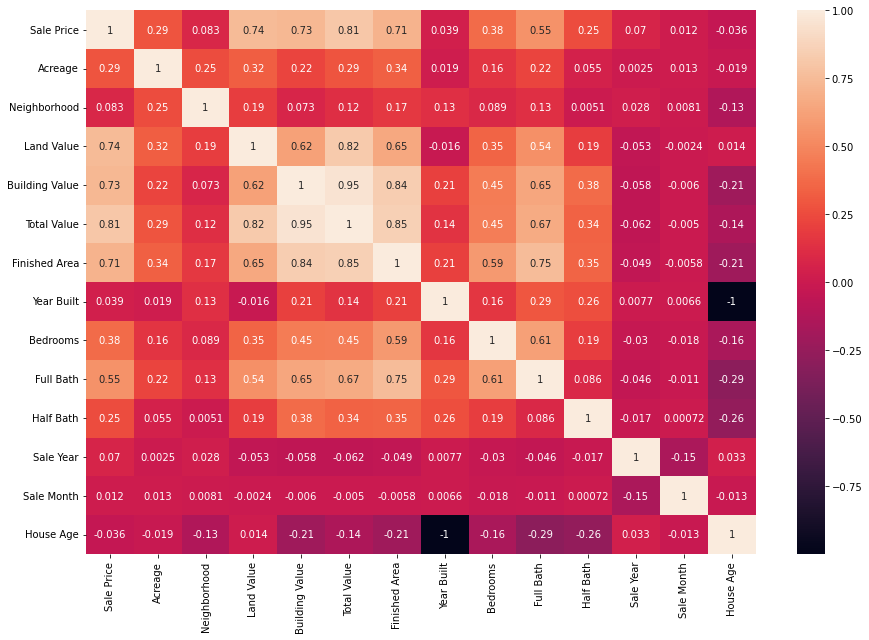

In [225]:
plt.figure(figsize=(15,10))
sns.heatmap(df3.corr(),annot=True)

In [226]:
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()
df3["Grade_code"] = ord_enc.fit_transform(df3[["Grade"]])
df3[["Grade", "Grade_code"]].head(11)

,Grade,Grade_code
1,C,3.0
2,C,3.0
3,B,2.0
4,C,3.0
5,C,3.0
7,D,4.0
8,D,4.0
9,C,3.0
10,C,3.0
11,C,3.0


In [227]:
df3.drop('Grade', axis=1, inplace=True)

In [228]:
df4 = pd.get_dummies(df3, columns = ['Property City','Sold As Vacant', 'Multiple Parcels Involved in Sale','Land Use','Tax District','Foundation Type', 'Exterior Wall'])

In [229]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23721 entries, 1 to 56615
Data columns (total 78 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Sale Price                                       23721 non-null  int64  
 1   Acreage                                          23721 non-null  float64
 2   Neighborhood                                     23721 non-null  float64
 3   Land Value                                       23721 non-null  float64
 4   Building Value                                   23721 non-null  float64
 5   Total Value                                      23721 non-null  float64
 6   Finished Area                                    23721 non-null  float64
 7   Year Built                                       23721 non-null  float64
 8   Bedrooms                                         23721 non-null  float64
 9   Full Bath                   

In [395]:
y = df4['Sale Price']

X = df4.drop(['Sale Price', 'House Age'], axis = 1)

In [396]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [397]:
lr= LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

In [398]:
y_pred

array([313311.32318855, 327999.69240754, 440705.92893785, ...,
       197281.07522883, 220842.61269904, 232980.23735534])

In [399]:
import statsmodels.api as sm
results = sm.OLS(y_train, X_train).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             Sale Price   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     986.0
Date:                Fri, 24 Jun 2022   Prob (F-statistic):               0.00
Time:                        07:27:58   Log-Likelihood:            -2.3512e+05
No. Observations:               17790   AIC:                         4.704e+05
Df Residuals:                   17719   BIC:                         4.709e+05
Df Model:                          70                                         
Covariance Type:            nonrobust                                         
                                                      coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------

In [400]:
from sklearn.metrics import accuracy_score
print("Accuracy : " , round((lr.score(X_test, y_test)*100),3), '%')

Accuracy :  67.433 %


## Decision Tree

In [245]:
df4['Absolute Value'] = df4['Sale Price'] - df4['Total Value']
status_mean = df4['Absolute Value'].mean()
df4.loc[df4['Absolute Value'] < status_mean, ('Absolute Value')] = 0
df4.loc[df4['Absolute Value'] >= status_mean, ('Absolute Value')] = 1

In [246]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23721 entries, 1 to 56615
Data columns (total 79 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Sale Price                                       23721 non-null  int64  
 1   Acreage                                          23721 non-null  float64
 2   Neighborhood                                     23721 non-null  float64
 3   Land Value                                       23721 non-null  float64
 4   Building Value                                   23721 non-null  float64
 5   Total Value                                      23721 non-null  float64
 6   Finished Area                                    23721 non-null  float64
 7   Year Built                                       23721 non-null  float64
 8   Bedrooms                                         23721 non-null  float64
 9   Full Bath                   

In [247]:
df5 = df4.drop(columns = ['Sale Price','Total Value','Building Value','Land Value'])

In [248]:
y = df5['Absolute Value']

X = df5.drop('Absolute Value',axis = 1)

In [249]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.2)

In [250]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier # Tree algorithm
from sklearn.tree import plot_tree  # Tree plotting

In [343]:
%%time
model_decision_tree = DecisionTreeClassifier(random_state = 100, max_depth = 20)
model_decision_tree.fit(X_train, y_train)

Wall time: 128 ms


DecisionTreeClassifier(max_depth=20, random_state=100)

In [344]:
model_decision_tree.score(X_train, y_train)
y_pred_dt = model_decision_tree.predict(X_test)
confusion_matrix(y_test, y_pred_dt)

array([[1715,  782],
       [ 682, 1566]], dtype=int64)

In [253]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, mean_squared_error

In [254]:
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

         0.0       0.72      0.69      0.70      2497
         1.0       0.67      0.70      0.68      2248

    accuracy                           0.69      4745
   macro avg       0.69      0.69      0.69      4745
weighted avg       0.69      0.69      0.69      4745



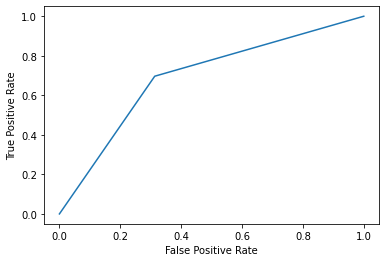

In [255]:
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(y_test,y_pred_dt)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Random Forest

In [256]:
from sklearn.ensemble import RandomForestClassifier
model_RF = RandomForestClassifier(n_estimators=160, criterion= 'gini', random_state = 43)

In [345]:
%%time
model_RF.fit(X_train, y_train)

Wall time: 2.96 s


RandomForestClassifier(n_estimators=160, random_state=43)

In [258]:
model_RF.score(X_train, y_train)

0.9994203204047217

In [259]:
model_RF.score(X_test, y_test)
y_pred_RF = model_RF.predict(X_test)
confusion_matrix(y_test, y_pred_RF)

array([[1868,  629],
       [ 574, 1674]], dtype=int64)

In [260]:
print(classification_report(y_test, y_pred_RF))

              precision    recall  f1-score   support

         0.0       0.76      0.75      0.76      2497
         1.0       0.73      0.74      0.74      2248

    accuracy                           0.75      4745
   macro avg       0.75      0.75      0.75      4745
weighted avg       0.75      0.75      0.75      4745



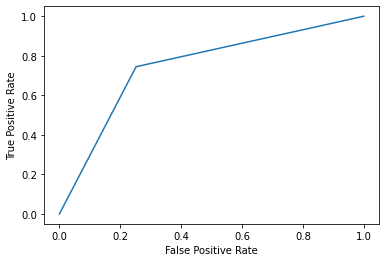

In [261]:
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(y_test,y_pred_RF)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Gradient Boosting

In [262]:
from sklearn.ensemble import GradientBoostingClassifier

In [329]:
grad_boosting_classifier = GradientBoostingClassifier(learning_rate = 0.4, max_depth = 16,n_estimators = 160,loss='exponential',criterion = 'squared_error')

In [346]:
%%time
grad_boosting_classifier.fit(X_train, y_train)

Wall time: 26.6 s


GradientBoostingClassifier(criterion='squared_error', learning_rate=0.4,
                           loss='exponential', max_depth=16, n_estimators=160)

In [331]:
grad_boosting_classifier.score(X_train, y_train)

0.9994203204047217

In [332]:
grad_boosting_classifier.score(X_test, y_test)
y_pred_gbm = grad_boosting_classifier.predict(X_test)
confusion_matrix(y_pred_gbm, y_test)

array([[1856,  562],
       [ 641, 1686]], dtype=int64)

In [333]:
print(classification_report(y_test, y_pred_gbm))

              precision    recall  f1-score   support

         0.0       0.77      0.74      0.76      2497
         1.0       0.72      0.75      0.74      2248

    accuracy                           0.75      4745
   macro avg       0.75      0.75      0.75      4745
weighted avg       0.75      0.75      0.75      4745



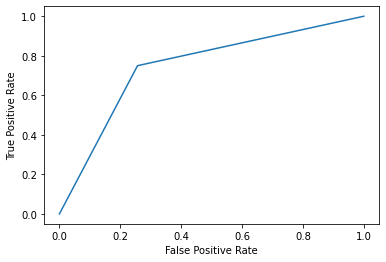

In [334]:
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(y_test,y_pred_gbm)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [269]:
models = []
#models.append(('Linear Regression', LinearRegression()))
models.append(('Decision Tree Classifier', DecisionTreeClassifier()))
models.append(('Random Forest Classifier', RandomForestClassifier()))
models.append(('Gradient Boosting Classifier', GradientBoostingClassifier()))

In [270]:
from sklearn import model_selection

In [342]:
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=20)
    cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

Decision Tree Classifier: 0.656208 (0.053938)
Random Forest Classifier: 0.729771 (0.052220)
Gradient Boosting Classifier: 0.741195 (0.050262)


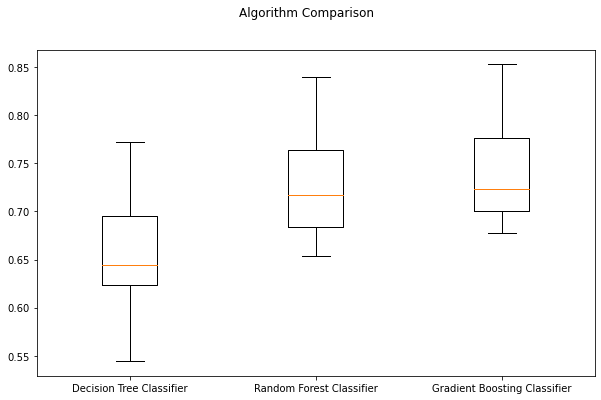

In [339]:
fig = plt.figure(figsize=(10,6))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Text(0, 0.5, 'Time Elapsed in seconds')

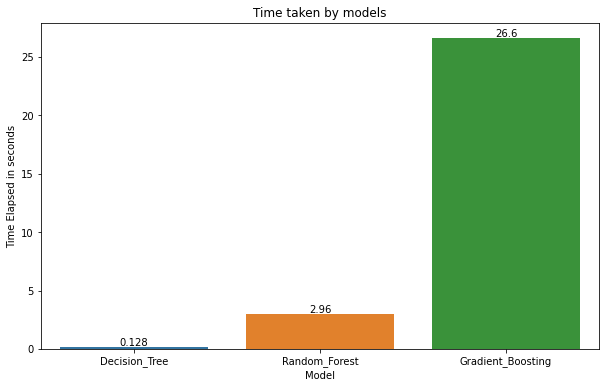

In [387]:
Time_df=[['Decision_Tree',0.128],['Random_Forest',2.96],['Gradient_Boosting',26.6]]

Time_for_models=pd.DataFrame(Time_df,columns=['Model','Time Taken'])

plt.figure(figsize=(10,6))
ax = sns.barplot(x='Model', y='Time Taken', data=Time_for_models)
ax.bar_label(ax.containers[0])
ax.set_title('Time taken by models')
ax.set_ylabel('Time Elapsed in seconds')